# PATH COVERING ALGORITHM

In [1]:
%matplotlib nbagg
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt

### REAL WOLD DATA

<IPython.core.display.Javascript object>


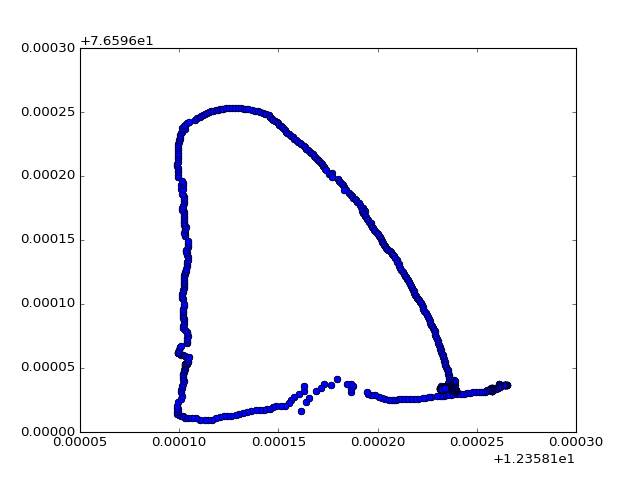

In [2]:
with open("demo.txt","r") as f:
    data = f.readlines()

x_coo=[]
y_coo=[]

for i in data:
    x , y = (i.strip()).split(' ')
    x_coo.append(float(x))
    y_coo.append(float(y))
    
plt.plot(x_coo,y_coo,'o')
plt.show()

## DUMMY DATA

In [3]:
with open("coor.txt","r") as f:
    data = f.readlines()

x_coo=[]
y_coo=[]

for i in data:    
    x , y = (i.strip()).split(' ')
    x_coo.append(float(x))
    y_coo.append(float(y))

    
coordinates = np.column_stack((x_coo,y_coo))


#plt.plot(x_coo,y_coo,'o')
#plt.show()

In [4]:
a = [[1,2],[2,3]]

[2,4] in a


False

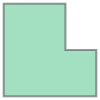

In [5]:
poly = Polygon(coordinates)

minx, miny, maxx, maxy = poly.bounds
poly

In [59]:
poly = Polygon(coordinates)
minx, miny, maxx, maxy = poly.bounds
longs = np.arange(minx, maxx+1)
lats =  np.arange(miny, maxy+1)
print(coordinates)

[[ 130.  100.]
 [ 130.  101.]
 [ 130.  102.]
 [ 130.  103.]
 [ 130.  104.]
 [ 130.  105.]
 [ 130.  106.]
 [ 130.  107.]
 [ 130.  108.]
 [ 130.  109.]
 [ 130.  110.]
 [ 130.  111.]
 [ 130.  112.]
 [ 130.  113.]
 [ 130.  114.]
 [ 130.  115.]
 [ 130.  116.]
 [ 130.  117.]
 [ 130.  118.]
 [ 130.  119.]
 [ 130.  120.]
 [ 130.  121.]
 [ 130.  122.]
 [ 130.  123.]
 [ 130.  124.]
 [ 130.  125.]
 [ 130.  126.]
 [ 130.  127.]
 [ 130.  128.]
 [ 130.  129.]
 [ 130.  130.]
 [ 130.  131.]
 [ 130.  132.]
 [ 130.  133.]
 [ 130.  134.]
 [ 130.  135.]
 [ 130.  136.]
 [ 130.  137.]
 [ 130.  138.]
 [ 130.  139.]
 [ 130.  140.]
 [ 130.  141.]
 [ 130.  142.]
 [ 130.  143.]
 [ 130.  144.]
 [ 130.  145.]
 [ 130.  146.]
 [ 130.  147.]
 [ 130.  148.]
 [ 130.  149.]
 [ 130.  150.]
 [ 130.  151.]
 [ 130.  152.]
 [ 130.  153.]
 [ 130.  154.]
 [ 130.  155.]
 [ 130.  156.]
 [ 130.  157.]
 [ 130.  158.]
 [ 130.  159.]
 [ 130.  160.]
 [ 131.  160.]
 [ 132.  160.]
 [ 133.  160.]
 [ 134.  160.]
 [ 135.  160.]
 [ 136.  1

In [31]:
def create_waypoint(coordinates):
    poly = Polygon(coordinates)
    minx, miny, maxx, maxy = poly.bounds
    longs = np.arange(minx, maxx+1)
    lats =  np.arange(miny, maxy+1)
    traversed =[]
    waypoint = []
    for x in range(0,len(longs)):
        segment = []
        direction_update = False
        for y in range(0,len(lats)):
            coo = [longs[x],lats[y]]
            point = Point(longs[x],lats[y])
            if coo in traversed:
                continue
            elif poly.contains(point):
                segment.append(coo)
                traversed.append(coo)
            elif np.any(np.equal(coo , coordinates).all(axis=1)):
                segment.append(coo)
                traversed.append(coo)
            direction_update = True
        break    
        if direction_update:
            if x % 2 == 0 :
                waypoint.extend(segment)
            else:
                waypoint.extend(segment[::-1])
        else:
            #Todd Direction Changing
            print("Need to implement")
    return waypoint

wp = create_waypoint(coordinates)
        
    
    
[plt.plot(way_pts[0],way_pts[1],'ro-') for way_pts in wp ]
plt.show()             
            
        
    
    
    

In [ ]:
wp

In [ ]:
wp_arr = np.array(wp)
x_coo = wp_arr[:,0].tolist()
y_coo = wp_arr[:,1].tolist()

In [ ]:
from matplotlib.animation import FuncAnimation

wp_arr = np.array(wp)
x_coo = wp_arr[:,0].tolist()
y_coo = wp_arr[:,1].tolist()
frame = len(wp)+1
fig = plt.figure()
plt.xlim(129,191)
plt.ylim(98,160)
graph, = plt.plot([],[],'o')
def animate(i):
    graph.set_data(x_coo[:i],y_coo[:i])
    return graph

animation= FuncAnimation(fig,animate,frames=frame,interval=10,repeat=False)
plt.show()



In [ ]:
# #Creating Waypoints
# def create_way_points(x_coo,y_coo):
#     pts = np.column_stack((x_coo,y_coo))
#     poly = Polygon(pts)

#     minx, miny, maxx, maxy = poly.bounds
#     print(minx, miny, maxx, maxy)
    
#     longs = np.arange(minx+1, maxx,2)
#     lats =  np.arange(miny+1, maxy,2)
#     print(len(longs))
#     print("Calculating Waypoint .. Please Wait !!")
#     waypoint=[]
#     for i in range(0,len(longs)):
#         wp =[]
#         for j in range(0,len(lats)):
#             point = Point(longs[i],lats[j])
            
#             if poly.contains(point):
#                 wp.append([longs[i],lats[j]])
#         if i%2 == 0 :
#             waypoint.extend(wp)
#         else:
#             waypoint.extend(wp[::-1])
            
#     for i,j in zip(x_coo,y_coo):
#         waypoint.append([i,j])

#     print(len(waypoint),' waypoints collected')
#     for i in waypoint:
#         plt.plot(i[0],i[1],'ro-')
#     plt.show()   
# create_way_points(x_coo,y_coo)

<IPython.core.display.Javascript object>


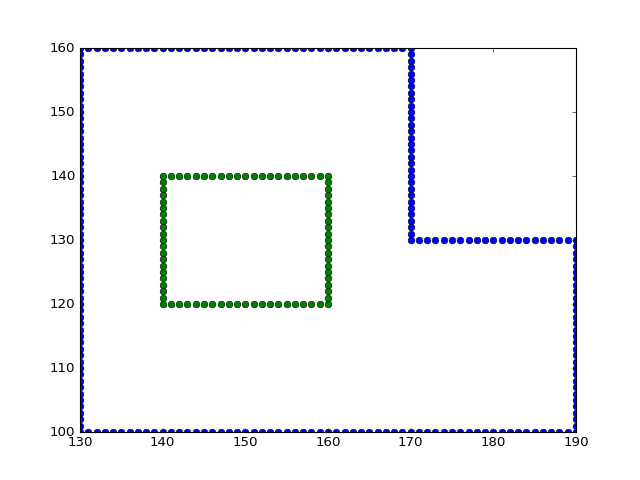

In [53]:
with open("obs","r") as f:
    data = f.readlines()

x_coo=[]
y_coo=[]

obs_x=[]
obs_y=[]
""
edges_points=[]

flag = False
for i in data:    
    if(i == '#\n'):
        flag=True
        continue
    x , y = (i.strip()).split(' ')
    
    
    if flag:
        obs_x.append(float(x))
        obs_y.append(float(y))
    else:
        x_coo.append(float(x))
        y_coo.append(float(y))
    edges_points.append([float(x),float(y)])

    
plt.plot(x_coo,y_coo,'o')
plt.plot(obs_x,obs_y,'o')

coordinates = np.column_stack((x_coo,y_coo))
obstacle_coordinates = np.column_stack((obs_x,obs_y))

In [85]:
for i in range(10,5,-1):
    print(i)

10
9
8
7
6


In [96]:
def create_waypoint(coordinates,obstacle_coordinates):
    poly = Polygon(coordinates)
    obstacle_poly = Polygon(obstacle_coordinates)
    edge_list_point  = coordinates.tolist()
    minx, miny, maxx, maxy = poly.bounds
    longs = np.arange(minx, maxx+1)
    lats =  np.arange(miny, maxy+1)
    traversed =[]
    waypoint = []
    for x in range(0,len(longs)):
        segment = []
        direction_update = False
        for y in range(0,len(lats)):
            coo = [longs[x],lats[y]]
            point = Point(longs[x],lats[y])
            if coo in traversed:
                continue
            elif np.any(np.equal(coo , coordinates).all(axis=1)):
                segment.append(coo)
                traversed.append(coo)
                
            elif poly.contains(point):
                if not obstacle_poly.contains(point):
                    segment.append(coo)
                    traversed.append(coo)
                else:
                    break
            else:
                break
                
            if coo in edges_points:
                edges_points.remove(coo)
            direction_update = True
            
        if direction_update:
            if x % 2 == 0 :
                waypoint.extend(segment)
            else:
                waypoint.extend(segment[::-1])
            
            if segment[-1] in edge_list_point :
                itemindex = edge_list_point.index(segment[-1])
                temp=None
                zone = False
            
                for i in range(itemindex):
                    if edge_list_point[i] in traversed:
                        continue
                    else:
                        temp = i
                        zone = True
                        break

            if zone:
                
                print('Zone Covered')
                x_start = edge_list_point[i][0]
                x_end = segment[-1][0]
                for i in range(int(x_start),int(x_end)):
                    segment=[]
                    for j in range(int(maxy+1),int(miny),-1):
                        point = Point(i,j)
                        coo = [i,j]
                        if np.any(np.equal(coo , coordinates).all(axis=1)):
                            segment.append(coo)
                            traversed.append(coo)
                        elif poly.contains(point):
                            if not obstacle_poly.contains(point):
                                segment.append(coo)
                                traversed.append(coo)
                            else:
                                break 
                        
                        if coo in edges_points:
                            edges_points.remove(coo)
                    if i % 2 == 0 :
                        waypoint.extend(segment)
                    else:
                        waypoint.extend(segment[::-1])
                print('Zones point added')
                zone = False
                    
            
            
        else:
            #Todd Direction Changing
            print("Need to implement")
    return waypoint

wp = create_waypoint(coordinates,obstacle_coordinates)

Zone Covered
Zones point added


In [97]:
len(edges_points)

0

<IPython.core.display.Javascript object>


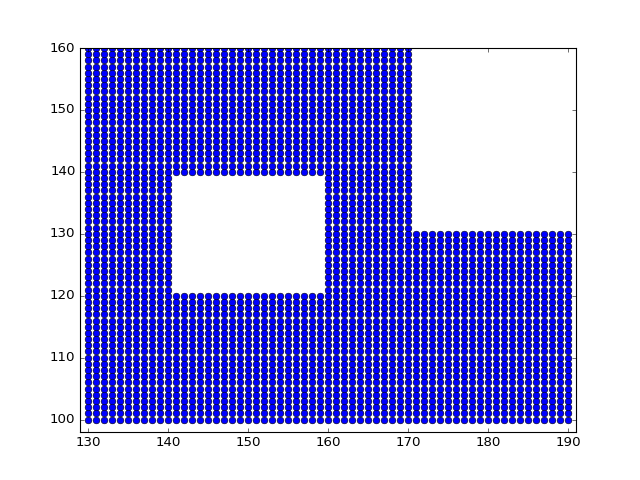

In [99]:
from matplotlib.animation import FuncAnimation

wp_arr = np.array(wp)
x_coo = wp_arr[:,0].tolist()
y_coo = wp_arr[:,1].tolist()
frame = len(wp)+1
fig = plt.figure()
plt.xlim(129,191)
plt.ylim(98,160)
graph, = plt.plot([],[],'o')
def animate(i):
    graph.set_data(x_coo[:i],y_coo[:i])
    return graph

animation= FuncAnimation(fig,animate,frames=frame,interval=10,repeat=False)
plt.show()



In [ ]:
print(len(edges_points))
pts = np.column_stack((obs_x,obs_y))
obst = Polygon(pts)
traversed_edge_points=[]

In [ ]:
# #Creating Waypoints
# def create_way_points(x_coo,y_coo):
#     pts = np.column_stack((x_coo,y_coo))
#     poly = Polygon(pts)

#     minx, miny, maxx, maxy = poly.bounds
#     print(minx, miny, maxx, maxy)
    
#     longs = np.arange(minx, maxx)
#     lats =  np.arange(miny, maxy)
#     print(len(longs))
#     print("Calculating Waypoint .. Please Wait !!")
#     waypoint=[]
    
#     count = 0
#     up=False
#     while len(edges_points)!=0:
#         for j in edges_points:
#             if j in traversed_edge_points:
#                 continue
#             minx = j[0]
#             miny = j[1]
#             print(minx ,'$', miny)
#             longs = np.arange(minx, maxx)
#             lats =  np.arange(miny, maxy)
#             for i in range(0,len(longs)):
#                 wp =[]
#                 for j in range(0,len(lats)):
# #                     print('#',longs[i],lats[j])
#                     if [longs[i],lats[j]] in traversed_edge_points:
#                         continue
#                     point = Point(longs[i],lats[j])
# #                     print('This ',point,'is in polygon',poly.contains(point))
#                     if poly.contains(point):
#                         if not obst.contains(point):
#                             wp.append([longs[i],lats[j]])
#                             if [longs[i],lats[j]] in edges_points:
#                                 edges_points.remove([longs[i],lats[j]])      
#                         else: 
#                             break
                
#                 if up :
#                     waypoint.extend(wp)
#                     up=False
#                 else:
#                     waypoint.extend(wp[::-1])
#                     up=True
#                 traversed_edge_points.extend(wp)


#             if count == 0:
#                 for i,j in zip(x_coo[::-1],y_coo[::-1]):
#                     waypoint = [[i,j]]+waypoint
#                     #waypoint.append([i,j])
#                     edges_points.remove([i,j])
#                     traversed_edge_points.append([i,j])
#             count=1

#     with open("waypoint","w+") as op:
#         for i in waypoint:
#             op.write(str(i[0])+' '+str(i[1]))
#             op.write('\n')
#     with open("edge_point","w+") as op:
#         for i in edges_points:
#             op.write(str(i[0])+' '+str(i[1]))
#             op.write('\n')
#     with open("traversed","w+") as op:
#         for i in traversed_edge_points:
#             op.write(str(i[0])+' '+str(i[1]))
#             op.write('\n')
    
    
#     print(len(waypoint),' waypoints collected')
    
    
#     for i in waypoint:
#         plt.plot(i[0],i[1],'ro-')
#     plt.show()   
#     return waypoint
# waypoints = create_way_points(x_coo,y_coo)

# with open("final_waypoint","w+") as obj:
#     for i in waypoints:
#         obj.write(str(i[0])+' '+str(i[1]))
#         obj.write('\n')

In [ ]:
# from matplotlib.animation import FuncAnimation

# x_coo=[]
# y_coo=[]
# with open("final_waypoint","r") as obj:
#     d = obj.readlines()
#     for data in d:

#         x = float(data.split(' ')[0].strip())
#         y = float(data.split(' ')[1].strip())
#         x_coo.append(x)
#         y_coo.append(y)

# frame = len(x_coo)+1
# fig = plt.figure()
# plt.xlim(129,191)
# plt.ylim(98,160)
# graph, = plt.plot([],[],'o')

# def animate(i):
#     graph.set_data(x_coo[:i],y_coo[:i])
#     return graph

# animation= FuncAnimation(fig,animate,frames=frame,interval=10,repeat=False)
# plt.show()